# **Store Sales and Profit Analysis**

---

### **Project Overview**

This project analyzes store sales and profit data to uncover key trends and insights using Python libraries like Pandas, Plotly, and Matplotlib. The analysis covers sales performance, profit margins, regional trends, and the effects of discounts, with the goal of supporting data-driven decision-making for improved profitability.

### **Objective**

- Identify sales trends and seasonal patterns.
- Highlight the most profitable products and categories.
- Explore regional and customer segment performance.
- Understand the impact of discounts on sales and profit.

---

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.io as pio
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.offline import iplot, plot
from plotly.subplots import make_subplots

# Comment the following line to make plots interactive
pio.renderers.default = "png"

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Set default parameters
plt.rcParams.update({
    'figure.dpi': 200,            # Set the default DPI to 300
    'figure.facecolor': 'white',   # Set the default figure facecolor to white
    'axes.grid': True,           # Display grid on axes
    'grid.color': 'black',        # Set the grid color to black
    'grid.linestyle': '--',       # Set the grid line style to dashed
    'grid.linewidth': 0.5,        # Set the grid line width to 0.5
    'grid.alpha': 0.25,            # Set the grid alpha to 0.5
    'xtick.top': True,            # Display ticks on the top of the x-axis
    'xtick.bottom': True,         # Display ticks on the bottom of the x-axis
    'ytick.left': True,           # Display ticks on the left of the y-axis
    'ytick.right': True,          # Display ticks on the right of the y-axis
    'xtick.direction': 'in',       # Set the direction of x-axis ticks to 'in'
    'ytick.direction': 'in',       # Set the direction of y-axis ticks to 'in'
    'font.size': 10,              # Set the font size
    'text.usetex': True,          # Enable LaTeX rendering
    'font.family': 'serif',       # Font family for text
    'font.serif': 'Helvetica',  # Font name for serif font (Others: 'Times New Roman', 'Georgia', 'Helvetica', 'Palatino')
    'font.weight': 100,      # Font weight
    'axes.linewidth': 0.25,       # Spine line width
    'xtick.major.width': 0.25,    # Major tick line width for x-axis
    'xtick.minor.width': 0.25,    # Minor tick line width for x-axis
    'ytick.major.width': 0.25,    # Major tick line width for y-axis
    'ytick.minor.width': 0.25,     # Minor tick line width for y-axis
    'legend.frameon': False,      # Disable legend frame
})

tab_colors = list(plt.cm.tab20c.colors)

## 1. Data Loading and Preliminary Analysis

Source: [Kaggle](https://www.kaggle.com/datasets/vivek468/superstore-dataset-final)

In [3]:
df = pd.read_csv('Data/Superstore.csv', encoding='latin1')

In [4]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [5]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Row ID,9994.0,4997.500000,2885.163629,1.000,2499.25000,4997.5000,7495.750,9994.000
Postal Code,9994.0,55190.379428,32063.693350,1040.000,23223.00000,56430.5000,90008.000,99301.000
Sales,9994.0,229.858001,623.245101,0.444,17.28000,54.4900,209.940,22638.480
Quantity,9994.0,3.789574,2.225110,1.000,2.00000,3.0000,5.000,14.000
Discount,9994.0,0.156203,0.206452,0.000,0.00000,0.2000,0.200,0.800
Profit,9994.0,28.656896,234.260108,-6599.978,1.72875,8.6665,29.364,8399.976


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [8]:
df.isna().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.describe(include='object').T

,count,unique,top,freq
Order ID,9994,5009,CA-2017-100111,14
Order Date,9994,1237,9/5/2016,38
Ship Date,9994,1334,12/16/2015,35
Ship Mode,9994,4,Standard Class,5968
Customer ID,9994,793,WB-21850,37
Customer Name,9994,793,William Brown,37
Segment,9994,3,Consumer,5191
Country,9994,1,United States,9994
City,9994,531,New York City,915
State,9994,49,California,2001


## 2. Exploratory Data Analysis

#### 2.1 Top-Selling Products

In [11]:
top5_prods = df.groupby(['Product Name'])['Sales'].sum().sort_values(ascending=False).reset_index().head(5)
top5_prods

,Product Name,Sales
0,Canon imageCLASS 2200 Advanced Copier,61599.824
1,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.384
2,Cisco TelePresence System EX90 Videoconferenci...,22638.480
3,HON 5400 Series Task Chairs for Big and Tall,21870.576
4,GBC DocuBind TL300 Electric Binding System,19823.479


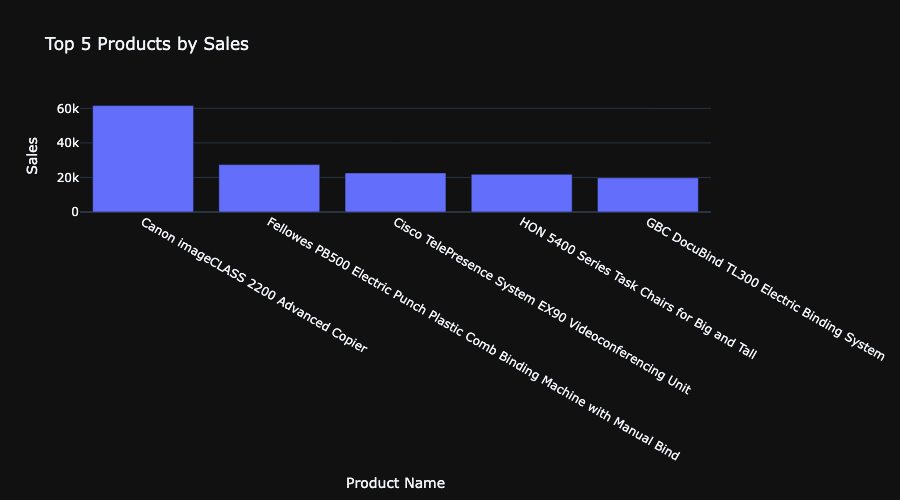

In [12]:
fig = px.bar(top5_prods, x='Product Name', y='Sales', title='Top 5 Products by Sales')
fig.update_layout(width=900, height=500, template='plotly_dark')
fig.show()

#### 2.2 Sales by month

In [13]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Order Month'] = pd.to_datetime(df['Order Date']).dt.month

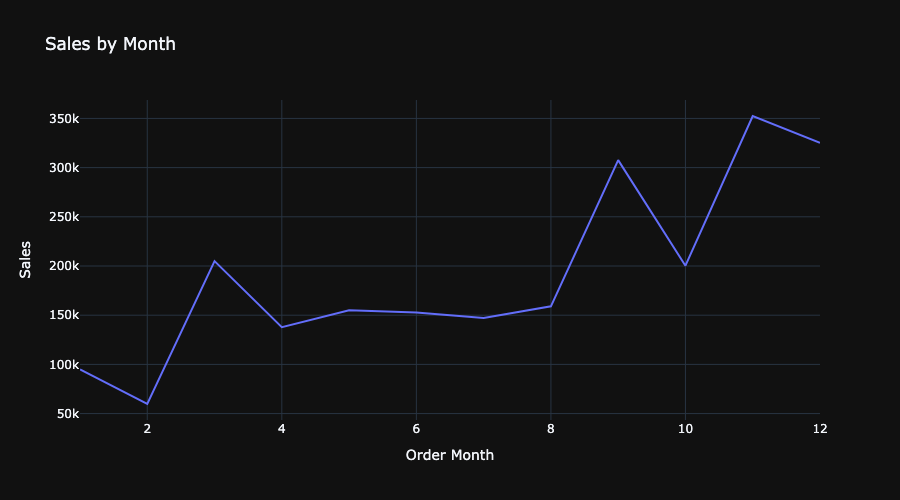

In [14]:
sales_by_month = df.groupby(['Order Month'])['Sales'].sum().reset_index()

fig = px.line(sales_by_month, x='Order Month', y='Sales', title='Sales by Month')
fig.update_layout(width=900, height=500, template='plotly_dark')
fig.show()

#### 2.3 Top 5 Profitable Products

In [15]:
top5_profitable_prods = df.groupby(['Product Name'])['Profit'].sum().sort_values(ascending=False).reset_index().head(5)
top5_profitable_prods

,Product Name,Profit
0,Canon imageCLASS 2200 Advanced Copier,25199.9280
1,Fellowes PB500 Electric Punch Plastic Comb Bin...,7753.0390
2,Hewlett Packard LaserJet 3310 Copier,6983.8836
3,Canon PC1060 Personal Laser Copier,4570.9347
4,HP Designjet T520 Inkjet Large Format Printer ...,4094.9766


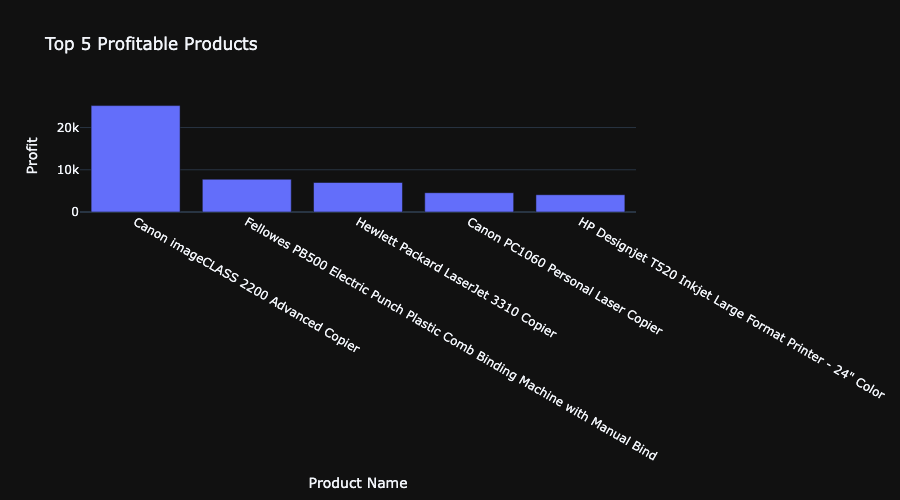

In [16]:
fig = px.bar(top5_profitable_prods, x='Product Name', y='Profit', title='Top 5 Profitable Products')
fig.update_layout(width=900, height=500, template='plotly_dark')
fig.show()

## 3. Category-Level Analysis

#### 3.1 Sales by Category

In [17]:
sales_by_category = df.groupby(['Category'])['Sales'].sum().reset_index()
sales_by_category

,Category,Sales
0,Furniture,741999.7953
1,Office Supplies,719047.0320
2,Technology,836154.0330


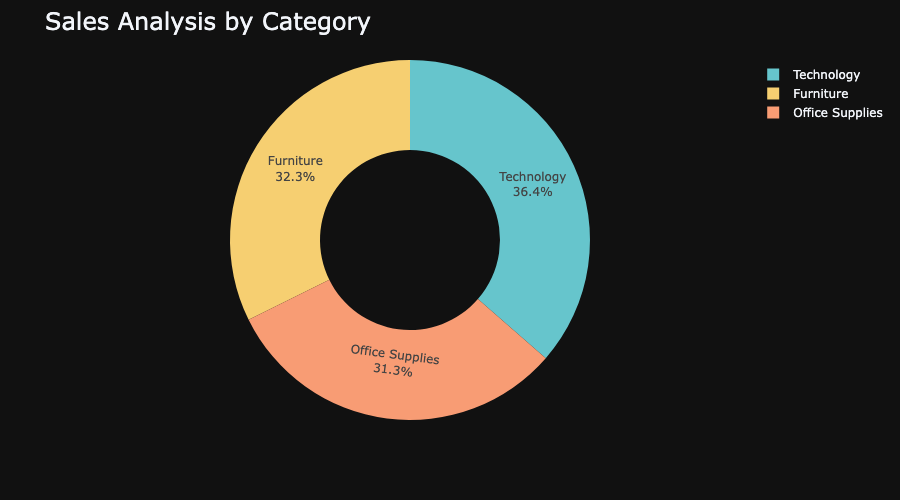

In [18]:
fig = px.pie(sales_by_category, values='Sales', names='Category', hole=0.5, color_discrete_sequence=px.colors.qualitative.Pastel)

fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(title_text='Sales Analysis by Category', title_font=dict(size=24))
fig.update_layout(width=900, height=500, template='plotly_dark')

fig.show()

#### 3.2 Profit by Category

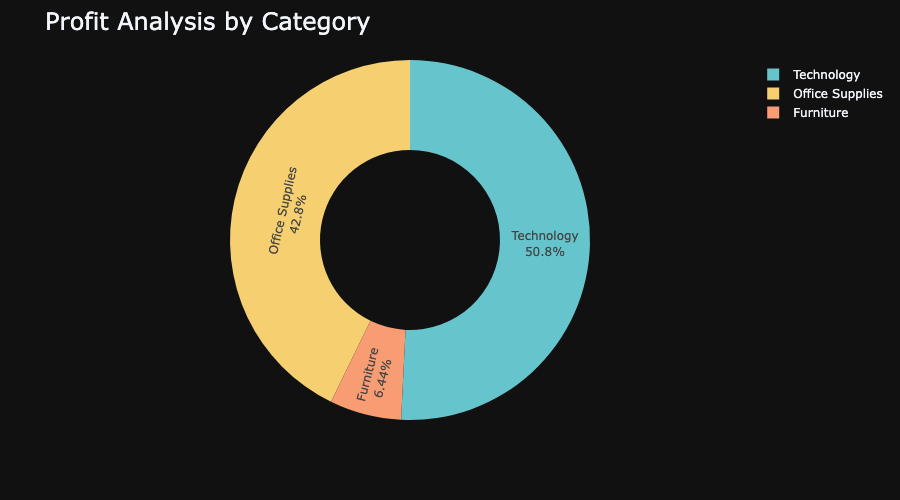

In [19]:
profit_by_category = df.groupby('Category')['Profit'].sum().reset_index()

fig = px.pie(profit_by_category, values='Profit', names='Category', hole=0.5, color_discrete_sequence=px.colors.qualitative.Pastel)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(title_text='Profit Analysis by Category', title_font=dict(size=24))
fig.update_layout(width=900, height=500, template='plotly_dark')
fig.show()

## 4. Trend Analysis

#### 4.1 Monthly Profit Analysis
 Which month generates the highest profit?

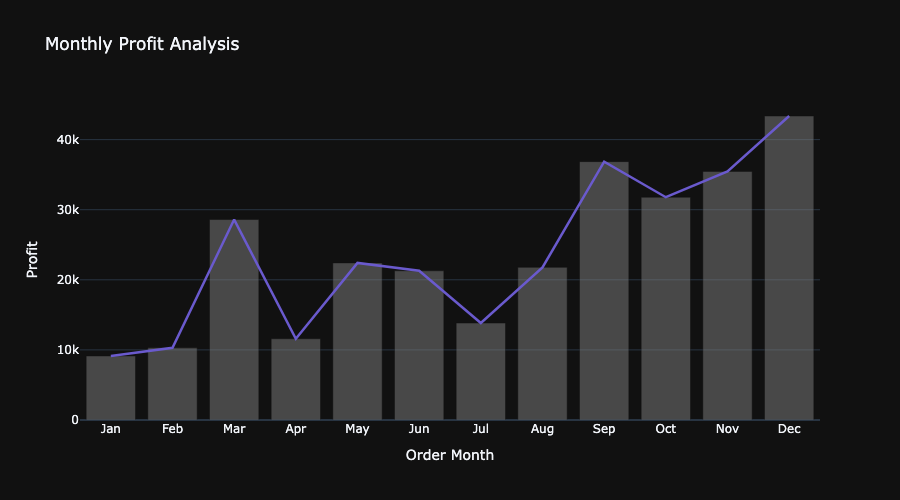

In [20]:
profit_by_month = df.groupby('Order Month')['Profit'].sum().reset_index()

fig = px.line(profit_by_month, x='Order Month', y='Profit', title='Monthly Profit Analysis', color_discrete_sequence=['slateblue'])
fig.add_bar(x=profit_by_month['Order Month'], y=profit_by_month['Profit'], name='Profit', marker_color='grey', opacity=0.5)
fig.update_layout(width=900, height=500, template='plotly_dark', showlegend=False)
fig['data'][0]['line']['width']=2.5
fig.update_xaxes(tickvals=np.arange(1, 13), ticktext=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

fig.show()

#### 4.2 Overall Sales Analysis

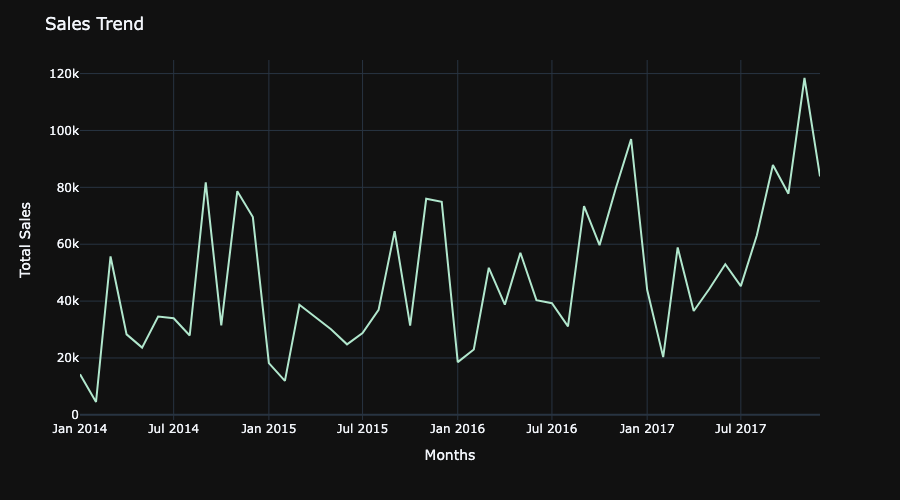

In [21]:
df['month'] = df['Order Date'].dt.to_period('M').astype(str)
monthly_sales = df.groupby('month')['Sales'].sum().reset_index()

fig = px.line(monthly_sales, x=monthly_sales['month'], y=monthly_sales['Sales'], template='plotly_dark', color_discrete_sequence=['#b1e7cd'])

fig.update_layout(title = 'Sales Trend ', yaxis_title = 'Total Sales', xaxis_title = 'Months', width=900, height=500)

fig.show()

#### 4.3 Yearly Profit Analysis

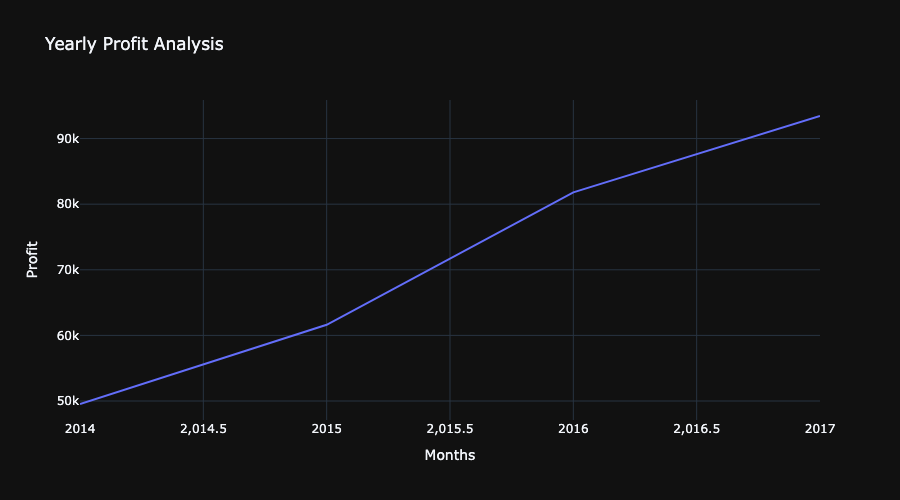

In [22]:
df['Order Year'] = pd.to_datetime(df['Order Date']).dt.year
profit_by_year = df.groupby('Order Year')['Profit'].sum().reset_index()

fig = px.line(profit_by_year, x='Order Year', y='Profit', title='Yearly Profit Analysis')
fig.update_layout(xaxis_title='Months', yaxis_title='Profit', width=900, height=500, template='plotly_dark')

fig.show()

## 5. Sub-Category and Region Analysis

#### 5.1 Profit by Sub-Category

Which are the most profitable sub-categories?

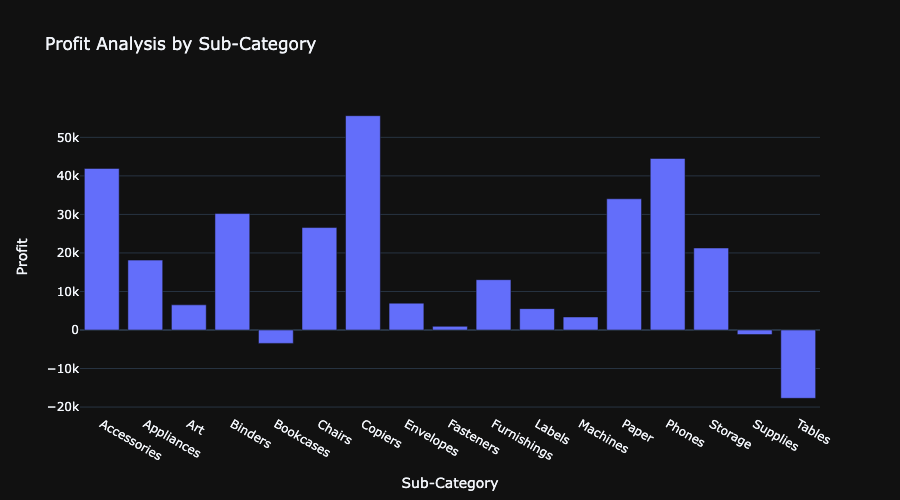

In [23]:
profit_by_subcategory = df.groupby('Sub-Category')['Profit'].sum().reset_index()

fig = px.bar(profit_by_subcategory, x='Sub-Category', y='Profit', title='Profit Analysis by Sub-Category')
fig.update_layout(width=900, height=500, template='plotly_dark')

fig.show()

#### 5.2 Sales by Sub-Category

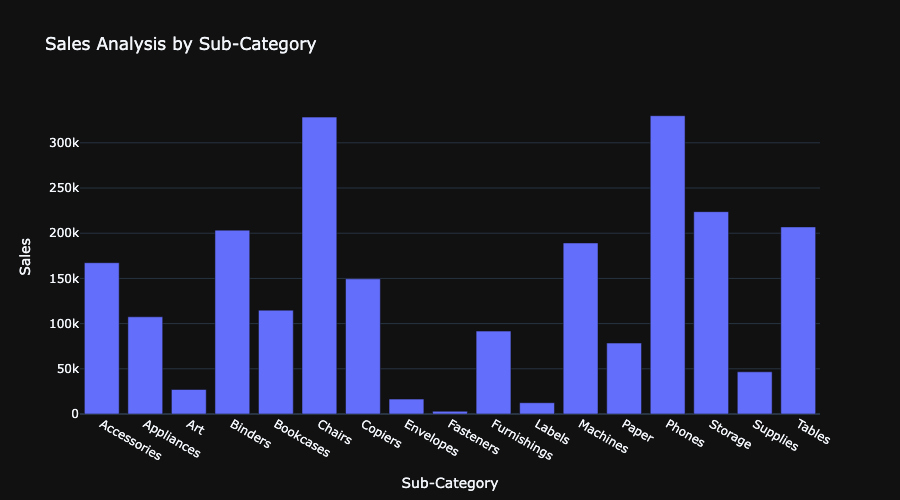

In [24]:
sales_by_subcategory = df.groupby('Sub-Category')['Sales'].sum().reset_index()

fig = px.bar(sales_by_subcategory, x='Sub-Category', y='Sales', title='Sales Analysis by Sub-Category')
fig.update_layout(width=900, height=500, template='plotly_dark')

fig.show()

#### 5.3 Regional Sales Analysis

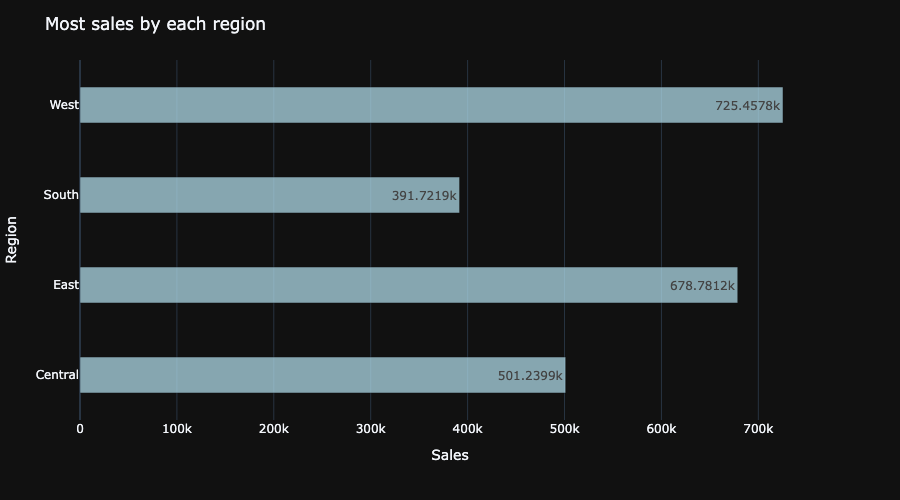

In [25]:
Regions_most_sales = df.groupby('Region')['Sales'].sum().reset_index()

fig=px.bar(Regions_most_sales, x=Regions_most_sales['Sales'], y='Region', template='plotly_dark', color_discrete_sequence=['lightblue'],text_auto=True, opacity=0.75)
fig.update_layout(bargap = 0.6, title='Most sales by each region', width=900, height=500)

fig.show()

In [26]:
Regions_most_sales

,Region,Sales
0,Central,501239.8908
1,East,678781.2400
2,South,391721.9050
3,West,725457.8245


In [27]:
Regions_most_sales['Sales'] / Regions_most_sales['Sales'].sum()

0    0.218196
1    0.295482
2    0.170521
3    0.315801
Name: Sales, dtype: float64

## 6. Discount and Profit Analysis

#### 6.1 Profit Margin Analysis

In [28]:
df['Profit Margin'] = (df['Profit'] / df['Sales']) * 100

# Profit margin average by category
profit_margin_by_category = df.groupby('Category')['Profit Margin'].mean().reset_index()
profit_margin_by_category['Profit Margin'] = profit_margin_by_category['Profit Margin'].round(2)
profit_margin_by_category

,Category,Profit Margin
0,Furniture,3.88
1,Office Supplies,13.80
2,Technology,15.61


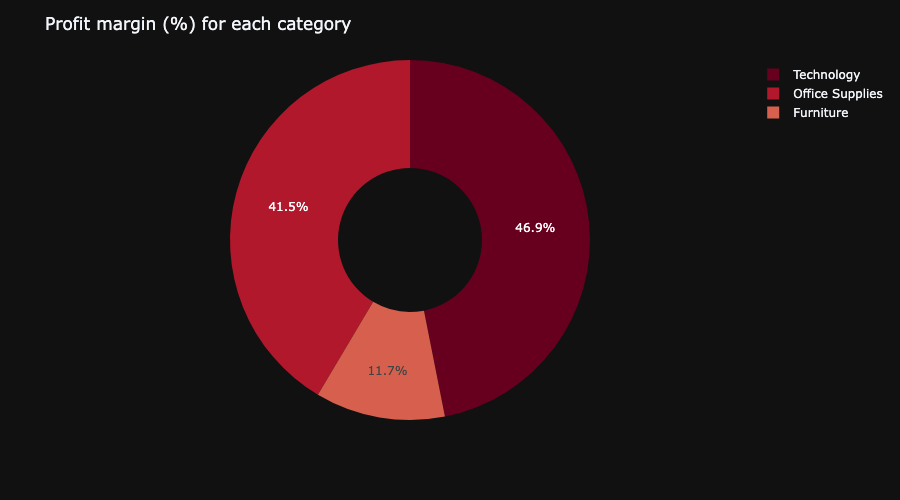

In [29]:
fig = px.pie(profit_margin_by_category, names=profit_margin_by_category['Category'], template='plotly_dark', 
             color_discrete_sequence=px.colors.sequential.RdBu, hole=0.4, values=profit_margin_by_category['Profit Margin'])

fig.update_layout(title='Profit margin (%) for each category ', width=900, height=500)

fig.show()

#### 6.2 Impact of Discount on Sales

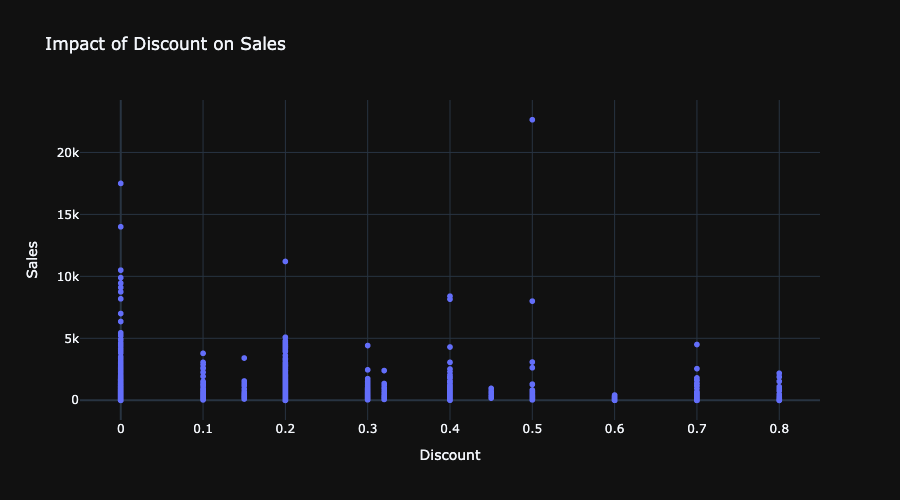

In [30]:
discount_sales = df.groupby('Discount')['Sales'].sum().reset_index()

fig = px.scatter(df, x='Discount', y='Sales', title='Impact of Discount on Sales')
fig.update_layout(width=900, height=500, template='plotly_dark')

fig.show()

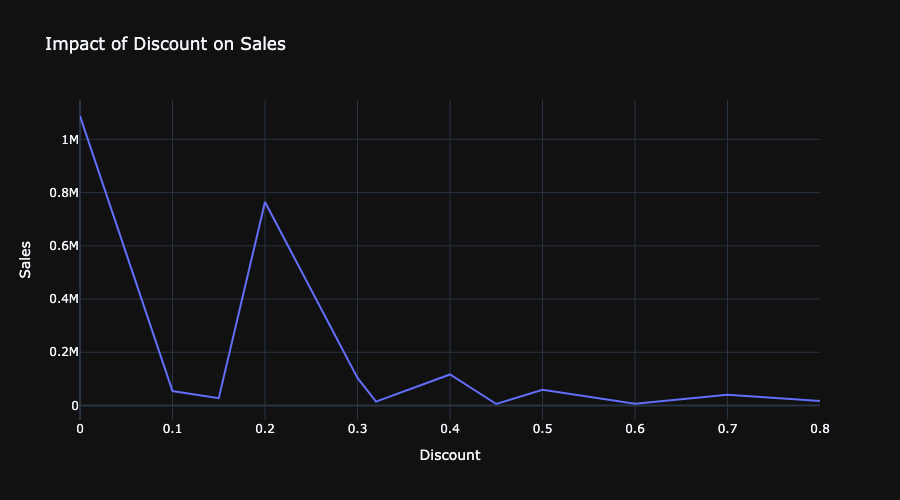

In [31]:
fig = px.line(discount_sales, x='Discount', y='Sales', title='Impact of Discount on Sales')
fig.update_layout(width=900, height=500, template='plotly_dark')

fig.show()

## 7. Customer Segment Analysis

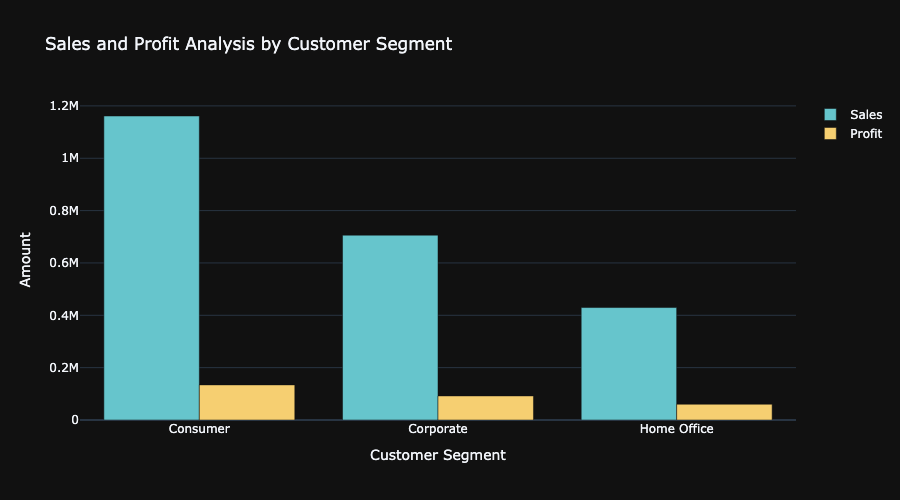

In [32]:
sales_profit_by_segment = df.groupby('Segment').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()

color_palette = px.colors.qualitative.Pastel

fig = go.Figure()
fig.add_trace(go.Bar(x=sales_profit_by_segment['Segment'], 
                     y=sales_profit_by_segment['Sales'], 
                     name='Sales',
                     marker_color=color_palette[0]))
fig.add_trace(go.Bar(x=sales_profit_by_segment['Segment'], 
                     y=sales_profit_by_segment['Profit'], 
                     name='Profit',
                     marker_color=color_palette[1]))

fig.update_layout(title='Sales and Profit Analysis by Customer Segment',
                  xaxis_title='Customer Segment', yaxis_title='Amount')
fig.update_layout(barmode='group', width=900, height=500, template='plotly_dark')

fig.show()

## Conclusion

### Summary:
This analysis identifies trends, top-performing products/categories, and regional and seasonal impacts on sales and profits. These insights can inform business strategies for improved profitability.